In [55]:
import pandas as pd
import numpy as np
from tensorflow.keras import datasets,models,layers
import seaborn as sn
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import classification_report

In [56]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

(50000, 32, 32, 3)

In [57]:
X_test.shape

(10000, 32, 32, 3)

In [58]:
y_train.shape

(50000, 1)

In [59]:
y_train=y_train.reshape(-1,)
y_train

array([6, 9, 9, ..., 9, 1, 1], dtype=uint8)

In [60]:
y_test = y_test.reshape(-1,)

In [61]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [62]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

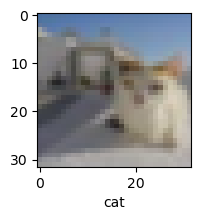

In [63]:
plot_sample(X_train, y_train, 80)

In [64]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [70]:
CNN=models.Sequential([
    layers.Conv2D(filters=6,kernel_size=(5,5),strides=(1, 1),input_shape=(32,32,3),activation='relu'),
    layers.MaxPooling2D((2,2), strides=(2, 2)),
    
    layers.Conv2D(filters=16,kernel_size=(5,5),strides=(1, 1),activation='relu'),
    layers.MaxPooling2D((2,2), strides=(2, 2)),
    
    layers.Flatten(),
    tf.keras.layers.Dense(120, activation='relu'),
    tf.keras.layers.Dense(84, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [71]:
CNN.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [72]:
CNN.fit(X_train,y_train,epochs=10)

Epoch 1/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.6046 - accuracy: 0.4153
Epoch 2/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.3379 - accuracy: 0.5186
Epoch 3/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.2242 - accuracy: 0.5647
Epoch 4/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.1522 - accuracy: 0.5916
Epoch 5/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.0878 - accuracy: 0.6128
Epoch 6/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.0352 - accuracy: 0.6338
Epoch 7/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.9914 - accuracy: 0.6476
Epoch 8/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.9500 - accuracy: 0.6640
Epoch 9/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.9150 - accuracy: 0.6762
Epoch 10/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.882

In [73]:
CNN.evaluate(X_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 1.1341 - accuracy: 0.6154


[1.134108304977417, 0.6154000163078308]

In [74]:
CNN.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 28, 28, 6)         456       
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 14, 14, 6)         0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 5, 5, 16)          0         
 g2D)                                                            
                                                                 
 flatten_4 (Flatten)         (None, 400)               0         
                                                                 
 dense_12 (Dense)            (None, 120)              

313/313 [==============================] - 1s 2ms/step


Text(95.72222222222221, 0.5, 'Truth')

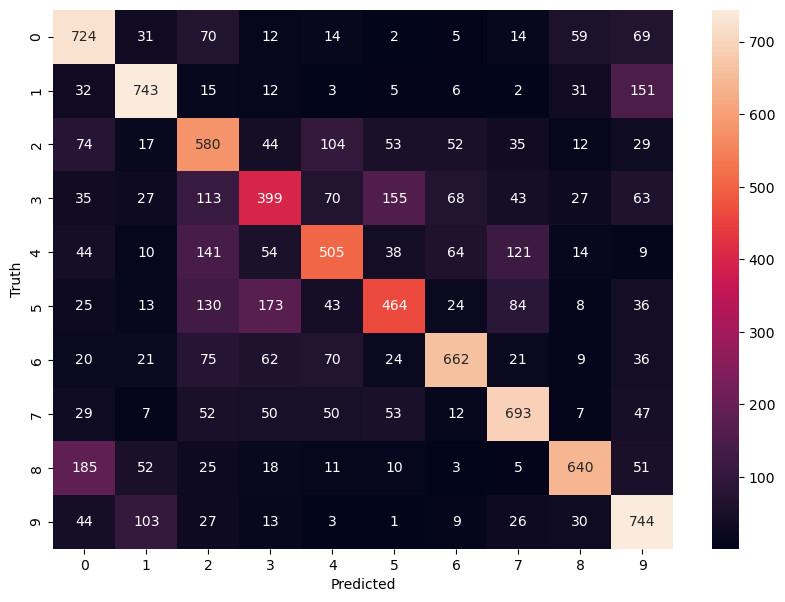

In [75]:
y_pred = CNN.predict(X_test)
y_pred_labels=[np.argmax(element) for element in y_pred]#returns the index of the highest probability.
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred_labels)
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [76]:
print("Classification Report: \n", classification_report(y_test, y_pred_labels))

Classification Report: 
               precision    recall  f1-score   support

           0       0.60      0.72      0.65      1000
           1       0.73      0.74      0.73      1000
           2       0.47      0.58      0.52      1000
           3       0.48      0.40      0.43      1000
           4       0.58      0.51      0.54      1000
           5       0.58      0.46      0.51      1000
           6       0.73      0.66      0.70      1000
           7       0.66      0.69      0.68      1000
           8       0.76      0.64      0.70      1000
           9       0.60      0.74      0.67      1000

    accuracy                           0.62     10000
   macro avg       0.62      0.62      0.61     10000
weighted avg       0.62      0.62      0.61     10000



### For tasks like CIFAR-10, it is often recommended to use deeper and more complex models like CNN with additional layers and modern architectural improvements like VGG, ResNet.